# Proyecto práctico: árbol de decisión y random forest con scikit-learn

Tipo : multiclase 

In [105]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [106]:
#Cargamos dataset a utilizar
df = pd.read_csv('/home/roy/Ramdom_forest_y_arboles_de_decision/data/car_evaluation.csv')

queresmos clasificar el estado del auto en diferentes tipos categorias 

## Análisis exploratorio de datos

In [107]:
#Visualizacion del dataframe
df.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [108]:
#Analizamos el shape del objeto
df.shape

(1727, 7)

In [109]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names

In [110]:
#Vericamos la transformacion
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [111]:
#Visualizamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [112]:
#Verificamos valores missings
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

unacc    muy mal estado

acc      mal estado

good     buen estado 

vgood    muy buen estado 

In [113]:
# Exploremos un poco mas la variable target
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

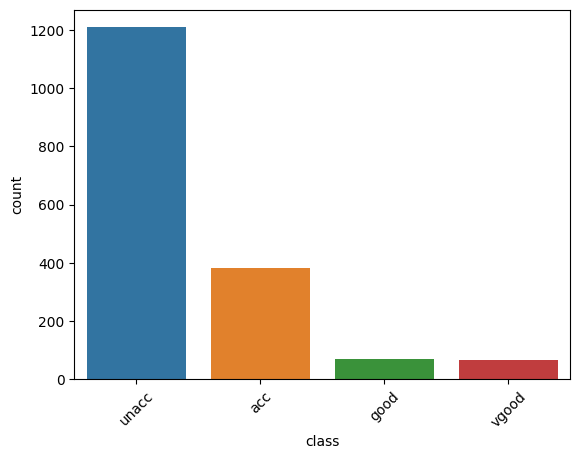

In [114]:
class_counts = df['class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts)
plt.xticks(rotation=45)
plt.show()

## Procesamiento de datos

In [115]:
#Separamos en X e y
X = df.drop(['class','doors'],axis=1) 
# X = df.drop(['class','buying','maint','doors','lug_boot'],axis=1)
y = df['class']

Que es x e y 

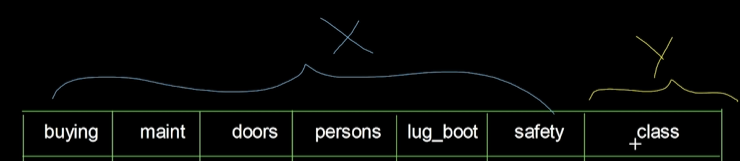

In [116]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [117]:
#Veamos que obtuvimos
X_train.shape,X_test.shape # tenemos las 6 variables de X con las observasiones 

((1208, 5), (519, 5))

In [118]:
y_train.shape,y_test.shape # nos da que solo tenemos una columna con las observasiones

((1208,), (519,))

In [119]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,persons,lug_boot,safety
1177,med,med,4,big,high
585,high,high,more,small,med
1551,low,med,4,med,med
727,high,med,more,big,high
707,high,med,2,big,low


In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 1177 to 1126
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1208 non-null   object
 1   maint     1208 non-null   object
 2   persons   1208 non-null   object
 3   lug_boot  1208 non-null   object
 4   safety    1208 non-null   object
dtypes: object(5)
memory usage: 56.6+ KB


## Entrenamiento de modelo de clasificación con árbol de decisión

In [121]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion 
import category_encoders as ce 

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety']) 
# encoder = ce.OrdinalEncoder(cols=['persons','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [122]:
#Verificamos la transformacion
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 1177 to 1126
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1208 non-null   int64
 1   maint     1208 non-null   int64
 2   persons   1208 non-null   int64
 3   lug_boot  1208 non-null   int64
 4   safety    1208 non-null   int64
dtypes: int64(5)
memory usage: 56.6 KB


In [123]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2,random_state=0)

In [124]:
#Entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [125]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)


In [126]:
y_train_pred_tree

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión

### Como evaluar un modelo de arbor de decision?

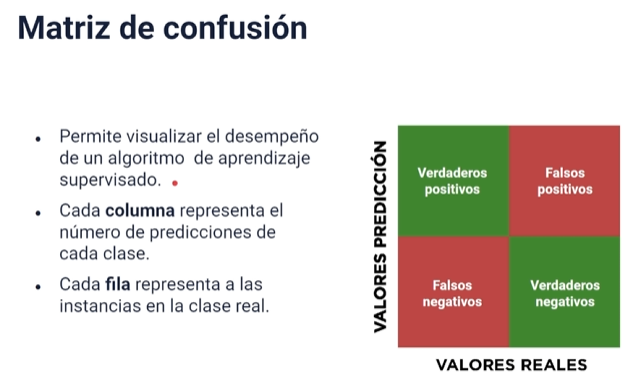

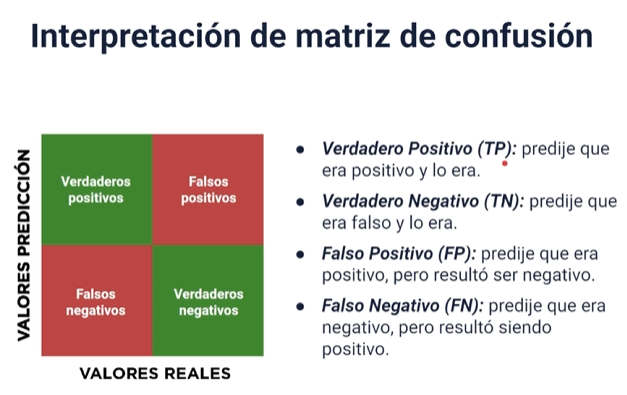

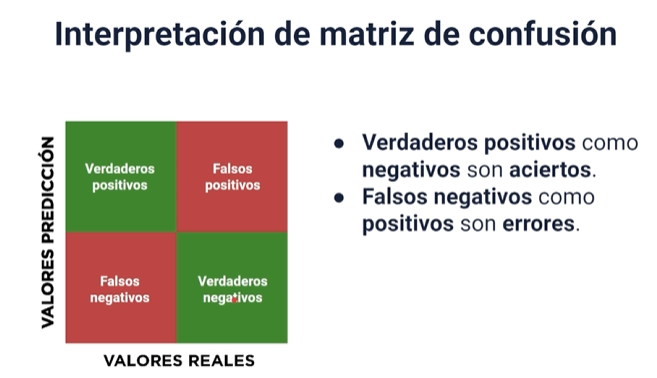

## Exactitud o accuracy 

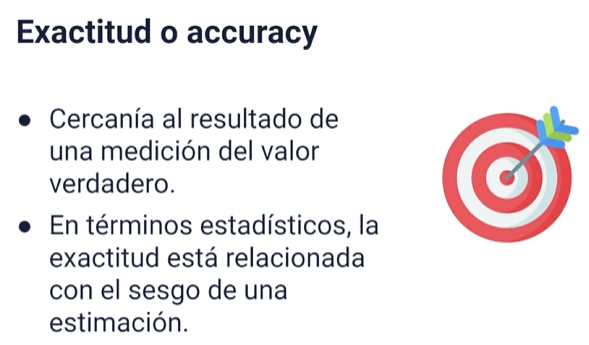

queremos tener un valor cercano a 1 pero no muy muy cercano porque podria ser overfitting 

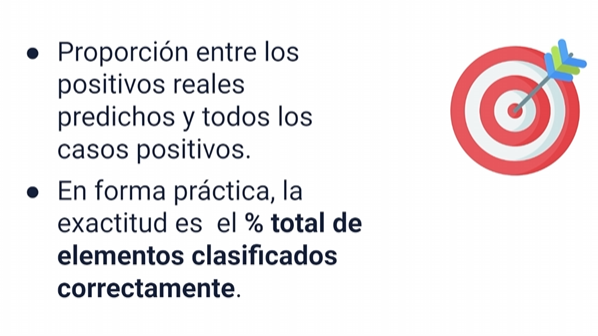

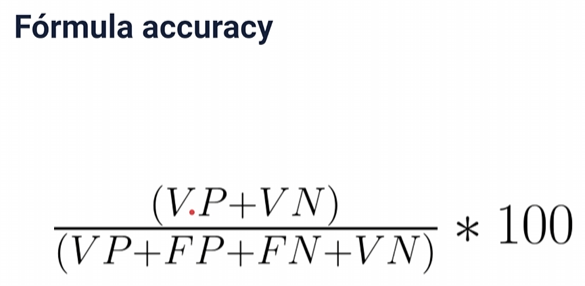

## Precision

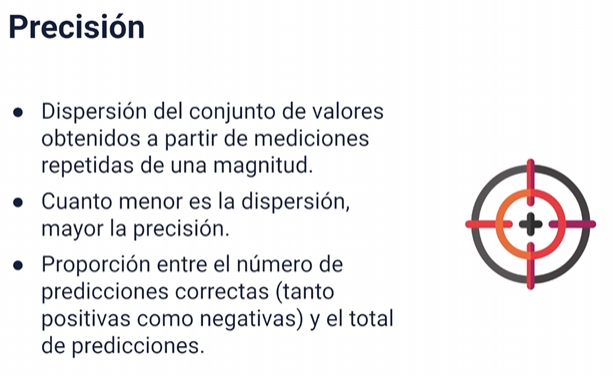

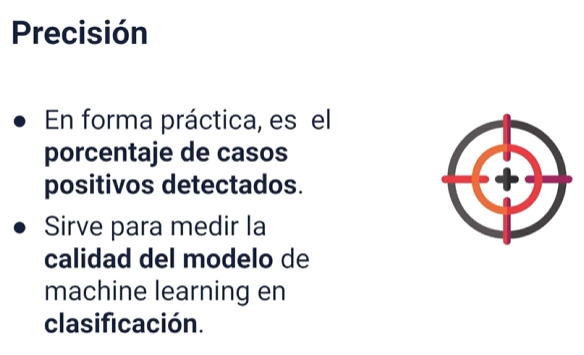

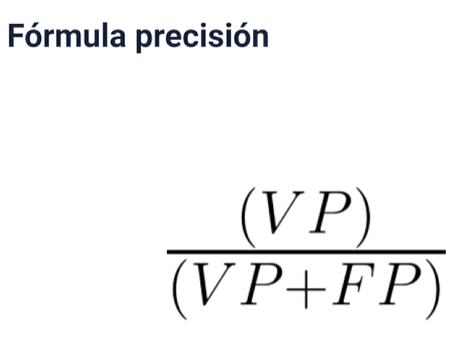

## Sensibilidad o Recall

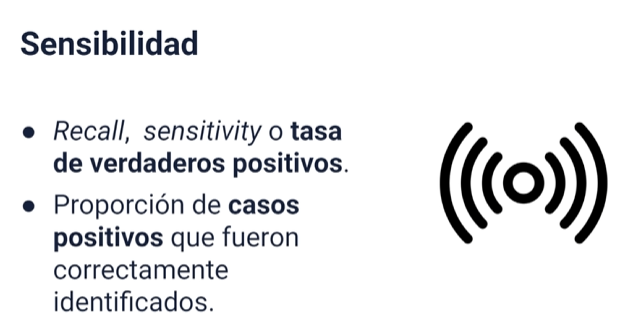

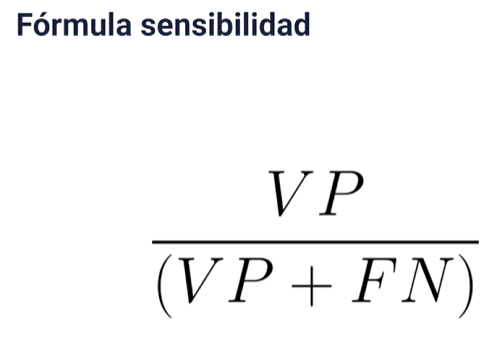

## Especificidad 

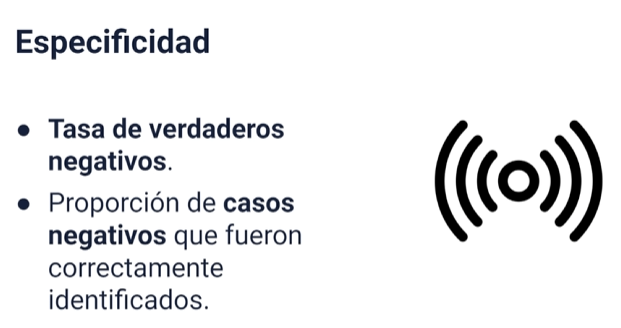

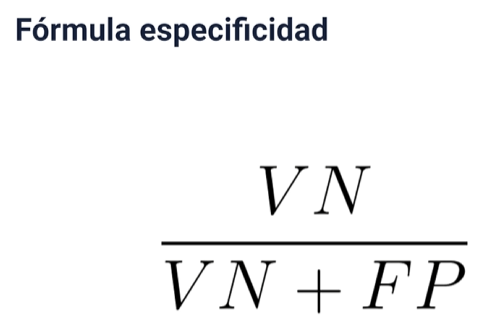

## F1-score

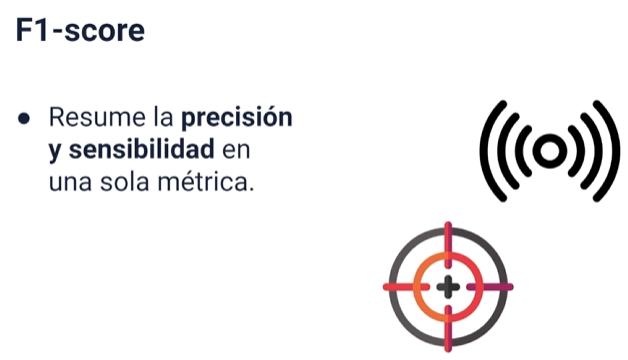

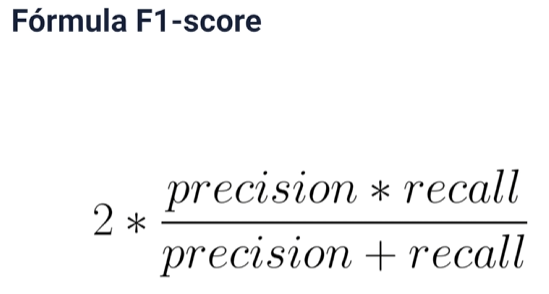

## Resumen

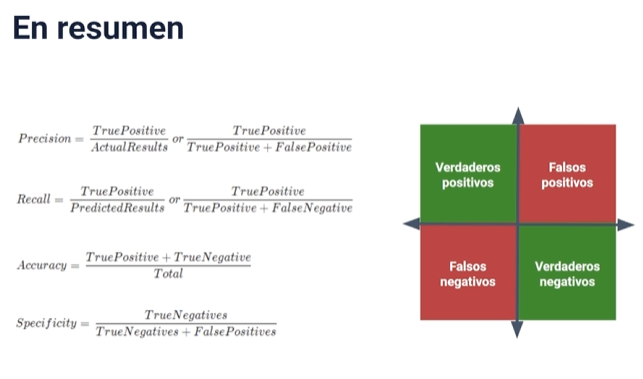

se recomienda trabajar mas con el f1-score porque es muy robusta o con el accuracy aunque no sea tan robusta es sencilla de calcular y facil de entender. de igual manera dando un vistso a las demas 

In [127]:
from sklearn.metrics import classification_report
target_names = y_train.unique()
print(classification_report(y_train, y_train_pred_tree, target_names=target_names))

              precision    recall  f1-score   support

       vgood       0.49      1.00      0.65       266
       unacc       0.00      0.00      0.00        52
         acc       1.00      0.78      0.88       848
        good       0.00      0.00      0.00        42

    accuracy                           0.77      1208
   macro avg       0.37      0.44      0.38      1208
weighted avg       0.81      0.77      0.76      1208



/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train,y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test,y_test_pred_tree)

print(f'el accuracy en train es {train_accuracy_tree}')
print(f'el accuracy en test es {test_accuracy_tree}')

el accuracy en train es 0.7673841059602649
el accuracy en test es 0.8015414258188824


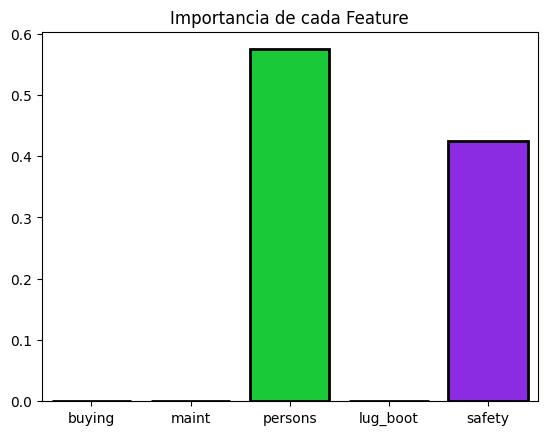

In [129]:
#Verificamos el feature importances
import seaborn as sns 

importances = tree.feature_importances_ # almacenando la importancia de cada una de las features 
columns = X.columns # variables que no son el target 
data = pd.DataFrame([importances], columns=columns)

sns.barplot(
    data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2
)
plt.title('Importancia de cada Feature')
plt.show()
# de este grafico se puede ver que solo las columnas de persons y safety son importantes para el modelo 

## Random forest

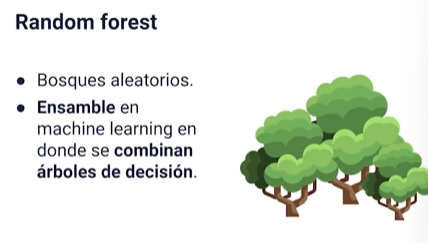

Random foreste es un método de ensamble que se basa en la combinación de múltiples arboles de decisión, al igual que el árbol de decisión, es un algoritmo de aprendizaje supervisado, que puede utilizarse en problemas de clasificación como de regresión.

¿Que es un ensamble?

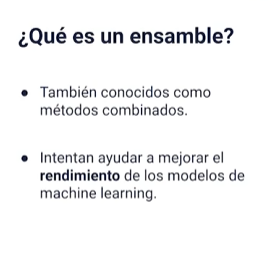

Intentan ayudar a mejorar el rendimiento de los modelos de
machine learning, utilizando todas las bondades de los arboles de decisión.

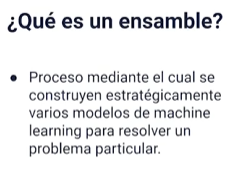

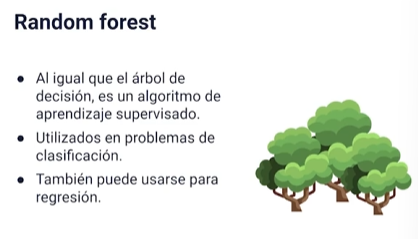

## Entrenamiento de modelo de clasificación con random forest

In [130]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,random_state=0)
rf.fit(X_train,y_train) #Entrenamiento del modelo con los datos de train.



RandomForestClassifier(n_estimators=10, random_state=0)

In [131]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [132]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train,y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test,y_test_pred_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.
print(f'el accuracy en train es {train_accuracy_rf}')
print(f'el accuracy en test es {test_accuracy_rf}')

el accuracy en train es 0.9685430463576159
el accuracy en test es 0.9229287090558767


In [133]:
# Visualizacion de las feature importantes
features_score = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
features_score

safety      0.290246
persons     0.234414
buying      0.187249
maint       0.167564
lug_boot    0.120526
dtype: float64

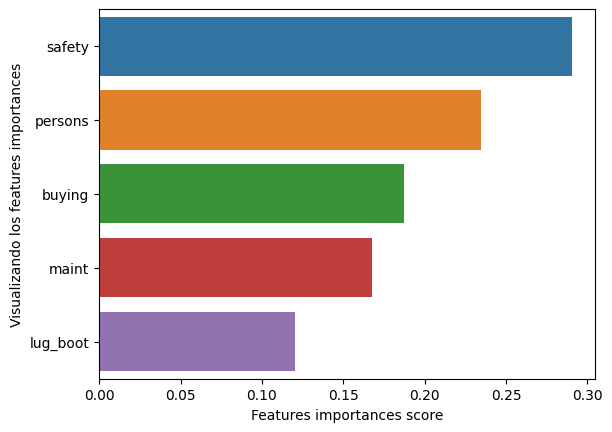

In [134]:
#Grafico de barras
sns.barplot(x=features_score,y=features_score.index)
plt.xlabel('Features importances score')
plt.ylabel('Visualizando los features importances')
plt.show()

In [135]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print(f'matriz de confusion {cm}')

matriz de confusion [[101   5  11   1]
 [  0   9   2   6]
 [ 10   0 351   0]
 [  5   0   0  18]]


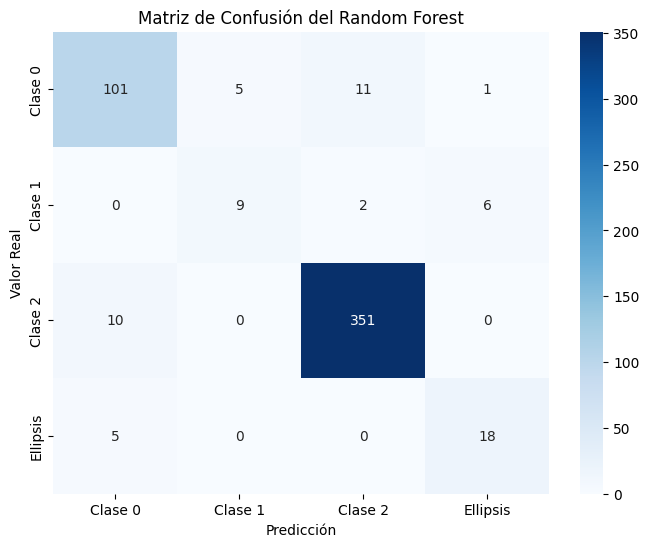

In [136]:

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred_rf)

# Define las etiquetas de las clases (opcional)
# Si tus clases son [0, 1], por ejemplo, puedes usar: class_labels = ["Clase 0", "Clase 1"]
class_labels = ["Clase 0", "Clase 1", "Clase 2", ...]  # Reemplaza los nombres de las clases según tu problema

# Crea el mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión del Random Forest")
plt.show()


In [137]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))


              precision    recall  f1-score   support

         acc       0.87      0.86      0.86       118
        good       0.64      0.53      0.58        17
       unacc       0.96      0.97      0.97       361
       vgood       0.72      0.78      0.75        23

    accuracy                           0.92       519
   macro avg       0.80      0.79      0.79       519
weighted avg       0.92      0.92      0.92       519

